# **RNN의 한계->Transformer**

## RNN  
- RNN: 앞뒤 내용이 서로 연관된 데이터에 대해 기억을 통해 이전 단계에서 처리한 정보를 현재 단계의 입력에 함께 활용하는 신경망  
- 장기 의존성 문제: 데이터가 길어질수록, 데이터의 후반부에서 초반에 위치한 정보가 잘 반영이 되지 않는 문제가 발생  
- 기울기 소실/폭발: 곱해지는 가중치의 횟수가 늘어남에 따라  
  - Exploding gradient: 계산값 발산, 기울기 폭발  
  - Vanishing grandient: 계산값 0에 수렴, 기울기 소실  

## LSTM  
- LSTM: RNN의 기울기 소실 문제 해결을 위해 등장   
  이전 Hidden state에서 새로운 중요한 정보는 Input gate를 통해 Cell state로 입력 -> 이전에 기억하고 있던 내용 중  중요하지 않다고 판단되는 정보는 Forget gate -> Cell state에 있는 내용 중 이번 Output에 사용할 정보는 Output gate로 가져와서 출력에 사용  
- 기울기 소실 문제: 앞쪽 데이터가 forget gate를 더 많이 통과해야 하므로 긴 문장에 있어서는 여전히 문제 발생 

## seq2seq  
- seq2seq: input 내용을 다른 시퀀스로 변환하는 모델 구조, Encoder-Decoder  
- 병목 현상: 고정된 크기의 context vecto를 사용하면서 일부 입력 데이터 소실 문제 발생  

## Attention  
- Attention: 출력 단어를 만들 때, 입력 문장에서 어떤 단어에 얼마나 집중할지를 고르는 기술  
 **병렬화: 출력의 시점마다 새로운 context vector를 동적으로 계산**  
- Attention의 장점:  

|  |RNN|Attention|
|---|---|---|
|시간 경과에 대한 유연성|장기의존성 문제|모든 단어에 직접적인 연결고리->멀리 떨어진 단어의 관계도 정보 손실 없이 명확하게 파악|
|**병렬화**|순차 계산 필수|모든 단어의 관계를 한번에 독립적으로 계산|
|  |**CNN**|**Attention**|
|공간에 대한 유연성|고정된 필터->지역적인 부분만 확인|픽셀 간의 거리에 상관없이 전체 이미지의 전역적인 관계 학습|

## Transformer  
- Transformer: RNN의 순차적인 계산 방식을 완전히 버리고, **어텐션(Attention)만으로 문장의 의미와 구조를 파악**    
- 기존과의 차이점    
  - Attention 기반 Seq2Seq: RNN을 사용해서 인코더와 디코더를 구현하고 여기에 attention을 사용  
  - Transformer: Attention만으로 인코더와 디코더를 구현  

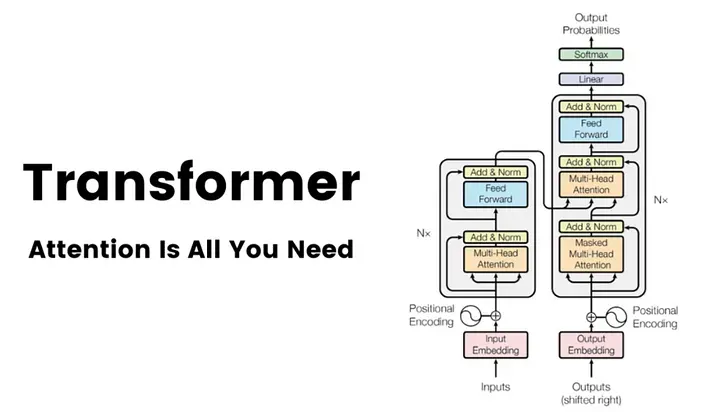 

# **Self-Attention**  

## Query
- 질문 또는 요청 
- 지금 당장 알고 싶거나 초점을 맞추고 있는 대상  
- In Attention : 문장 속 한 단어가 다른 단어들과의 관계를 파악하려 할 때, 그 기준이 되는 '나 자신'  
## Key  
- 검색 대상이 되는 모든 정보들이 달고 있는 **'이름표' 또는 '색인'**  
- In Attention: 문장 내 모든 단어들이 각각 키의 역할을 수행하며, 현재 쿼리 단어와 얼마나 관련이 있는지 평가를 진행  
## Value  
- 키와 한 쌍으로 묶여 있는 **'실제 내용물'**  
- In Attention: 특정 단어(Q)가 다른 단어(K)와 관련이 깊다고 판단되면, 그 단어(K)가 가진 실제 의미 정보(V)를 가져와 자신의 의미를 보강하는 데 사용  

## Cross Attention vs Self-Attention  

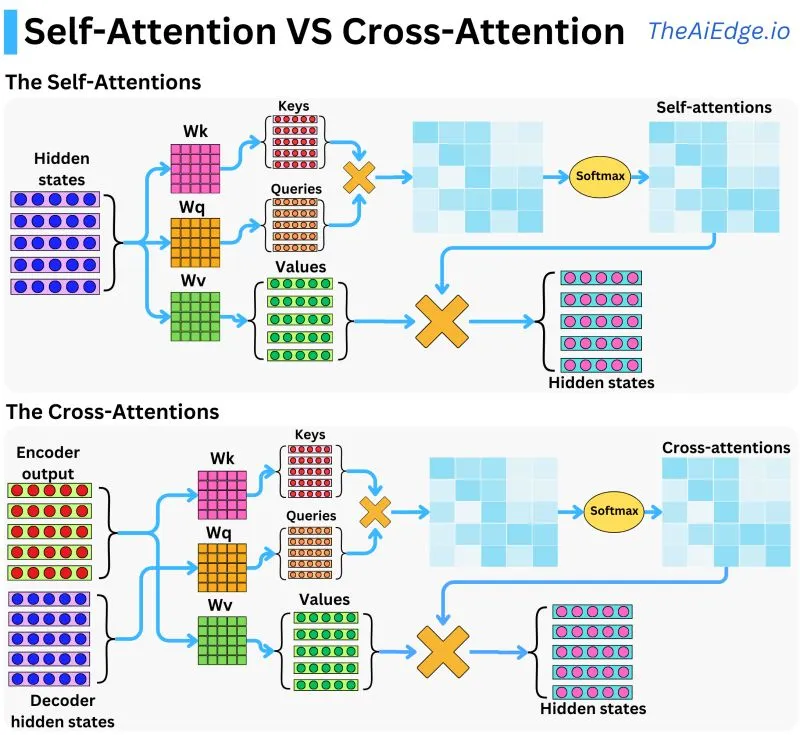  

| 구분 | 기존 어텐션 (Cross-Attention) | 셀프 어텐션 (Self-Attention) |
| --- | --- | --- |
| 핵심 아이디어 | 번역할 문장을 슬쩍슬쩍 보면서 단어를 생성 | 문장 자체를 뜯어보며 내부 관계를 파악 |
| 작동 방식 | 하나의 시퀀스가 완전히 다른 시퀀스를 참고하여 정보를 만들어내는 메커니즘 | 한 문장 내 모든 단어끼리 서로의 관계를 계산 |
| 참조 대상 | 서로 다른 시퀀스 (인코더 ↔ 디코더) | 동일한 시퀀스 (문장 내부 ↔ 문장 내부) |
| 주요 목적 | 인코더-디코더 연결, 정보 병목 현상 해소 | 시퀀스 내부의 문맥 및 의존 관계 파악 |
| 기반 아키텍처 | RNN (LSTM, GRU) | 트랜스포머 (Attention Only) |
| 병렬 처리 | 불가능 (순차적)  | 가능  |

- **기존 Attention in Seq2Seq (Cross-Attention)**  
  - Query와  Key - Value쌍이 서로 다른 시퀀스에서 출력  
  - 하나의 시퀀스가 완전히 다른 시퀀스를 참고하여 정보를 만들어내는 메커니즘-> **Decoder가 Encoder를 참고하는 과정**  

- **Self-Attention**  
  - Query와  Key - Value쌍이 같은 시퀀스에서 출력  
  - 핵심과정  
    1. 단어의 프로필 만들기 (벡터 임베딩)  
    각 단어를 고유한 특징을 담은 벡터로 변환  
    2. 단어 간 관계 점수 계산 (내정 및 정렬 점수)    
    모든 단어 벡터끼리 서로 얼마나 관련이 깊은지 '관계 점수'를 계산  
    3. 중요도 배분 (소프트맥스 & 어텐션 가중치)   
    계산된 관계 점수를 총합이 1이 되는 확률값, 즉 'Attention Weight'로 변환, '특정 단어를 이해하는 데 다른 단어들이 각각 몇 %씩 중요한가?'를 나타냄  
    4. 문맥이 풍부해진 새로운 프로필 생성  
    이 가중치를 바탕으로 각 단어는 문장 내 다른 단어들의 정보를 자신에게 맞게 조합하여 “문맥이 완벽하게 반영된 새로운 프로필(벡터)”가 됨  

- **Dot-Product Attention**  
  - Attention Score를 계산하는 가장 기본적인 방법  
  - 쿼리(Query)와 키(Key) 벡터를 내적(Dot Product)하여 유사도를 구함  
  - 문제점: 벡터의 차원 $d_k$가 커질수록 내적의 결과가 너무 커지거나 작아지게 되는 문제  

- **Scaled Dot-Product Attention**  
  - 현재 트랜스포머 방식의 표준  
  -  Dot-Product Attention 과정에서 내적을 진행한 후, 값의 크기를 맞추는 스케일링 과정 추가   
  - 쿼리(Q) 벡터와 모든 키(K) 벡터를 각각 내적하여 유사도 계산을 진행 -> 계산된 값을 $\sqrt{d_K}$ 로 나누어 스케일링 진행  

# **Multi-Head Attention**  

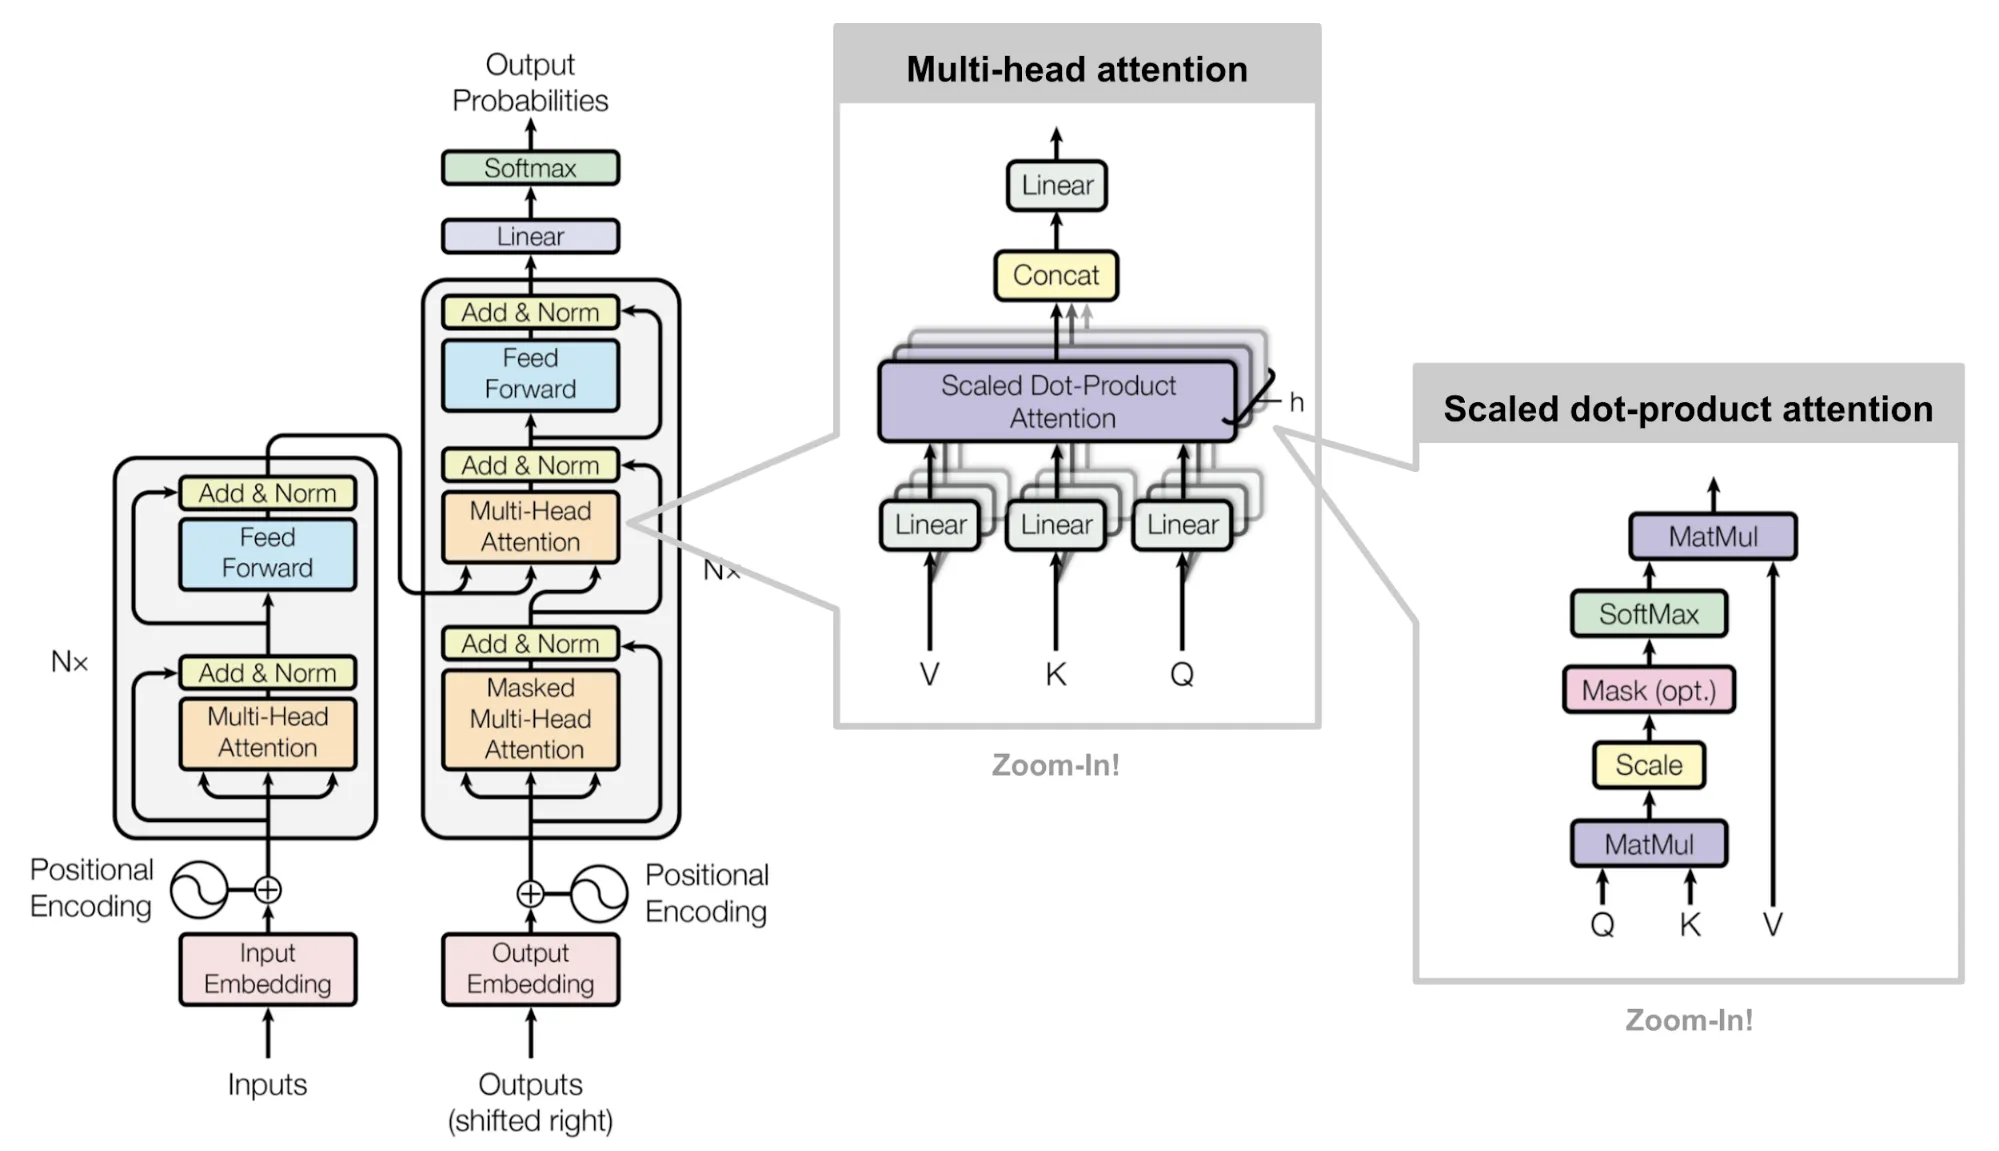  

- 인코더에서 Multi-Head Attention이 한 번, 디코더에서 Multi-Head Attention이 두 번  

- Single Head Attention  
  - 문장 내 단어들 간의 관계를 파악하기 위해 하나의 가중치 행렬$(W^Q, W^K, W^V)$만을 학습하고 사용  
  - 512차원의 입력 벡터 → 이 벡터를 위한 어탠션 가중치 분포 계산 → 가중합 하여 새로운 512차원의 벡터 출력  
  - 한계: 하나의 어텐션 분포 안에서 각 단어 간 문법적인 관계, 의미적인 관계, 위치 관계 등 모든 종류의 정보를 한 번에 담아 가중 평균을 구해버리기 때문에 각 단어 간의 중요한 관계를 놓쳐버릴 수 있음  

- **Multi Head Attention**  
  - 한 단어와 다른 단어 간의 관계를 여러 차원으로 나누어 병렬로 학습  
  - 512차원의 입력 벡터를 64차원씩 8개의 벡터로 나눔 -> Attention 스코어를 병렬로 여러 번 계산  
  - 작동 방식  
    1. **분할**: 하나의 512차원 벡터가 들어옴 ->  8개의 작은 벡터 그룹(Q, K, V)으로 투영(projection)하여 8개의 서로 다른 관점으로 나눔 -> 입력 벡터에 8세트의 서로 다른 가중치 행렬을 곱함 -> 512차원의 큰 문제 하나를 서로 다른 관점을 담은 8개의 독립적인 64차원짜리 작은 벡터(Q, K, V 세트)들로 분할 
    2. **병렬 어텐션 계산**: 8개의 헤드는 서로에게 전혀 간섭하지 않고, 병렬로 Scaled Dot-Product Attention을 계산 -> Softmax 함수를 적용하여 총합이 1인 어텐션 가중치(Attention_Weights_1)를 만듦  
    3. **결합 및 최종 투영**: 8개의 64차원 결과 벡터들을 순서대로 이어 붙여 하나의 거대한 512차원 벡터(8×64=512)를 만듦 -> 이 정보들을 잘 융합하고 최종적으로 정리하기 위해, 또 다른 가중치 행렬을 곱해줌  


# **Transformer 전체 아키텍쳐**

## Transformer 전처리 단계  
1. **토큰화**  

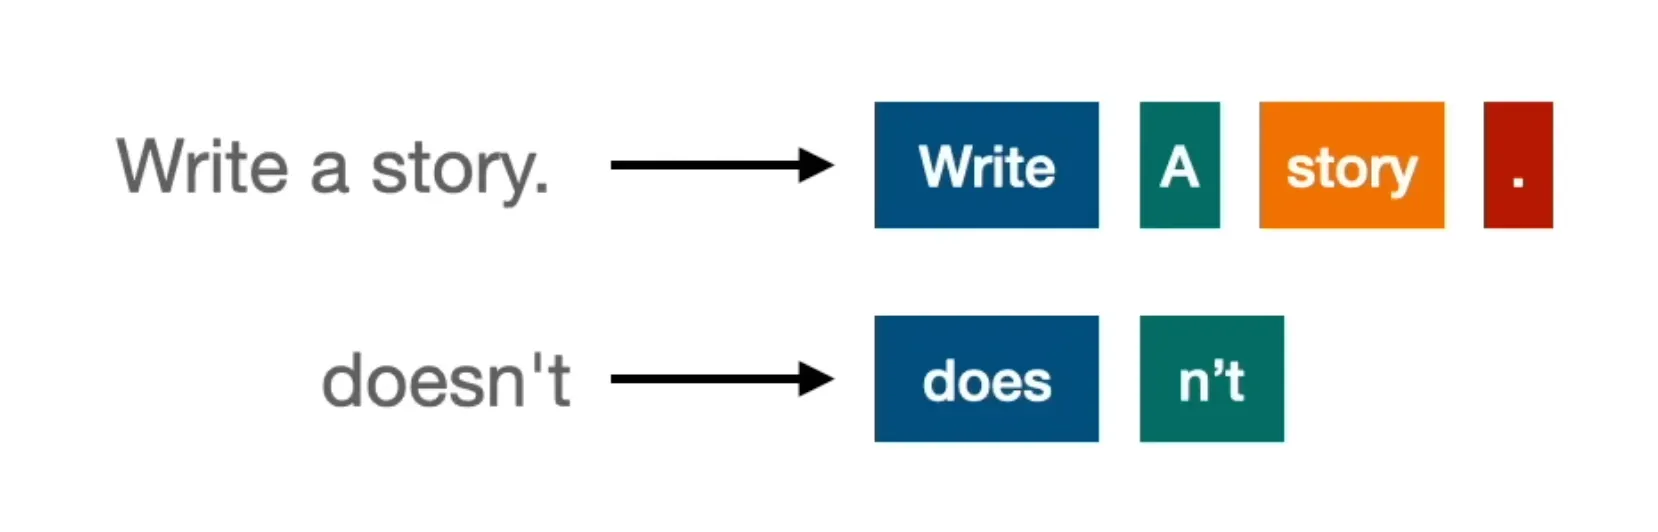 

- 입력 텍스트를 모델이 처리할 수 있는 단위(tokens)로 나누는 단계  

2. **임베딩**  
- 토큰화된 각 단위(토큰)가 임베딩 단계에서 숫자의 벡터로 변환됨  
- 단어의 의미를 **공간적**으로 표현(의미적으로 유사한 단어들은 임베딩 공간에서 유사한 숫자(좌표)로 변환)   

3. **positional encoding**  
- 단어들의 순서 정보를 임베딩 벡터에 추가하는 단계  
- 각 단어의 임베딩 좌표에 일관된 순서(consistent sequence)를 따르는 다른 숫자를 추가하여 순서 정보를 기록  

## Transformer의 encoder & decoder  
- **encoder**  

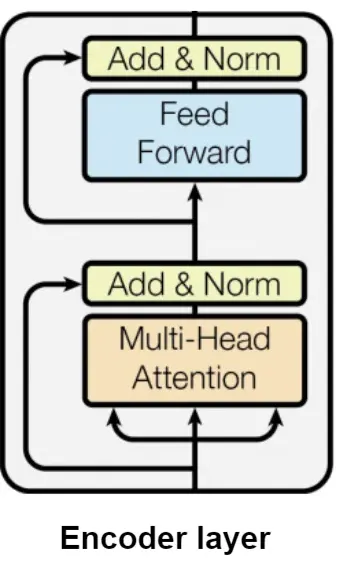  

1. multi-head attention  
2. feed-forward  
  - 입력 벡터의 차원을 확장하고 비선형 변환(ex: ReLU)을 적용하여 새로운 표현을 생성하는 신경망 구조   
- 잔차 연결: 기울기 소실 및 폭주 현상 해결을 위해 지름길을 만들어서 출력에 입력값을 바로 전달  
- 층 정규화: 입력 벡터의 평균과 분산을 사용해서 정규화하는 것     
<br><br><br>
- **decoder**  

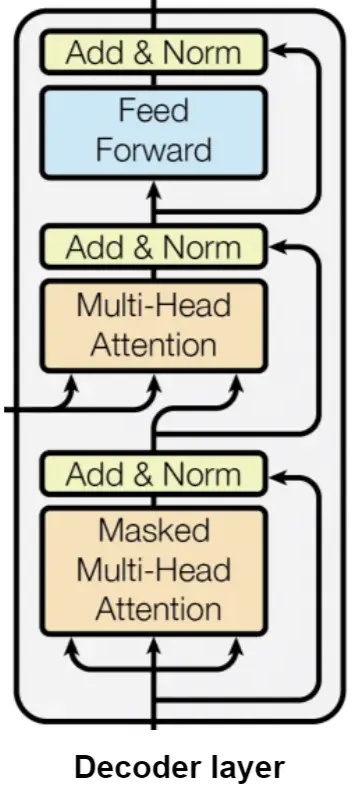

1. **masked multi head attention**  
  - 미래 시점의 단어 정보를 참고하지 못하도록 마스크(mask)를 적용하는 어텐션 메커니즘  
2. Encoder-Decoder Multi-Head Attention (Cross-Attention)  
  - 디코더가 인코더의 출력(Context)을 참고하면서 현재 생성 중인 단어를 입력 문장의 의미와 연결하는 과정  
3. Feed-Forward Layer  


## 전체 흐름  
1. 입력 준비: 문장을 **[의미 + 위치]** 벡터로 바꾸기(임베딩, 포지셔널 인코딩)  
2. 인코더: 입력 문장의 **[문맥적 의미]** 깊이 이해하기-**Self-Attention**을 이용해 입력 문장 내 모든 단어 간의 관계 파악  
3. 디코더: 번역 문장을 [한 단어씩] 생성하기- <start> 토큰을 시작으로, 인코더의 이해($K_{enc}, V_{enc}$)를 참조하며 출력  